In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
leis = pd.read_json('leis.json')
leis.drop(['documento'], inplace=True, axis=1)
print(leis.info())
print(leis.nunique())
leis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6033 entries, 0 to 6032
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   titulo     6033 non-null   object
 1   categoria  6033 non-null   object
 2   resumo     6033 non-null   object
 3   texto      6033 non-null   object
dtypes: object(4)
memory usage: 188.7+ KB
None
titulo       6033
categoria       8
resumo       4961
texto        6029
dtype: int64


,titulo,categoria,resumo,texto
0,"DECRETO Nº 8854, de 28 de fevereiro de 2013.",Decretos,DELEGA COMPETÊNCIA À SECRETARIA MUNICIPAL DE P...,"O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta..."
1,"DECRETO Nº 8849, de 25 de fevereiro de 2013.",Decretos,ABRE CRÉDITO SUPLEMENTAR AO ORÇAMENTO DO MUNIC...,"O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta..."
2,"DECRETO Nº 8853, de 27 de fevereiro de 2013.",Decretos,NOMEIA MEMBROS DO CONSELHO MUNICIPAL DE DESENV...,"O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta..."
3,"DECRETO Nº 8967, de 17 de julho de 2013",Decretos,ALTERA O QUADRO DE DETALHAMENTO DE DESPESA DO ...,"O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta..."
4,"DECRETO Nº 8982, de 30 de julho de 2013",Decretos,AUTORIZA O FUNCIONAMENTO DE ESTABELECIMENTOS C...,"O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta..."
...,...,...,...,...
6028,RESOLUÇÃO Nº 125/1980,Resoluções,DISPÕE SOBRE A CONCESSÃO DE TÍTULO DE CIDADÃO ...,Faço saber que a Câmara Municipal aprovou e eu...
6029,RESOLUÇÃO Nº 403/2003,Resoluções,AUTORIZA A MESA DIRETIVA DO PODER LEGISLATIVO ...,"A CÂMARA MUNICIPAL DE FEIRA DE SANTANA, Estado..."
6030,RESOLUÇÃO Nº 492/2014,Resoluções,INSTITUI A SEGUNDA SEMANA DO MÊS DE AGOSTO EM ...,"A CÂMARA MUNICIPAL DE FEIRA DE SANTANA, Estado..."
6031,RESOLUÇÃO Nº 382/2001,Resoluções,CRIA A MEDALHA VEREADOR DIVAL FIGUEIREDO MACHA...,"A CÂMARA MUNICIPAL DE FEIRA DE SANTANA, Estado..."


In [3]:
leis.iloc[len(leis)-1, 3]

'A CÂMARA MUNICIPAL DE FEIRA DE SANTANA, Estado da Bahia, na conformidade do artigo 70, Inciso V, da Lei Municipal nº37, de 05 de Abril de 1990 e, artigos 287, § 2º e, 420, do Regimento Interno, promulga a seguinte Resolução:\n\nArt. 1ºDê-se aos dispositivos abaixo mencionados, da Resolução nº393/2002 - Regimento Interno, as seguintes redações:\n\n"Art. 7º A Mesa Diretora da Câmara compor-se-á do Presidente, Primeiro e Segundo Secretários, com mandato de 02 ( dois ) anos, admitida a recondução para a eleição subsequente.\n\n§ 4º Se, hora regimental, não estiver presente o Presidente, abrirá os trabalhos o Vice-Presidente ou, na falta deste, o Primeiro ou Segundo Secretários, na sequência, ou ainda, caso estes não estejam presentes, o Vereador mais votado nas eleições municipais."\n\n"Art. 33 Compete, privativamente, ao Vice-Presidente:"\n\n"Art. 36 ...\n\nI - ...\n\ne) acompanhar e supervisionar a Ata da Sessão, proceder a sua leitura e assiná-la depois do Presidente e do Vice-Presiden

In [4]:
from nltk.corpus import stopwords
import re
import unicodedata

def limpa_texto(text, string=True) -> str or list:
    if (type(text) == float):
        return ''

    # Remove pontuacao, digitos e espacos
    text = ' '.join(re.findall(r'\b[a-zÀ-ú]+\b', text.lower()))
    
    # Remove acentos, cedilhas etc
    nfkd_form = unicodedata.normalize('NFKD', text)
    text = ''.join([char for char in nfkd_form if not unicodedata.combining(char)])

    # Remove stopwords
    my_stopwords = stopwords.words('portuguese')
    my_words = ['feira', 'santana', 'art', 'municipal', 'lei', 'r', 
    'prefeito', 'câmara', 'municipio', 'data', 'seguinte', 'disposições',
    'estado', 'bahia', 'vigor', 'secretário', 'decreto', 'projeto', 
    'iii', 'i', 'ii',  'contrário', 'presidente', 'artigo',
    'faço', 'parágrafo', 'executivo', 'gabinete', 'único', 'sanciono', 
    'desta', 'v', 'iv', 'autoria', 'através', 'deste', 'vice', 'autor',
    'qualquer', 'b', 'decretou', 'execução', 'sobre', 'das', 'decorrentes',
    'decreta', 'resolução', 'geral', 'uso', 'ato', 'diretiva', 'exercício',
    'seguintes', 'meio', 'm', 'c', 'correrão']
    my_stopwords = my_stopwords + my_words

    text = [word for word in text.split() if word not in my_stopwords]

    if string:
        return ' '.join(text)
    else:
        return text

# Semelhança de documentos

In [5]:
leis['texto_limpo'] = leis['texto'].apply(limpa_texto)

In [6]:
# Constrói matriz de documentos
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer # Trasnformar pra TF IDF depois pra testar
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(leis['texto_limpo'])
X

<6033x28875 sparse matrix of type '<class 'numpy.int64'>'
	with 534596 stored elements in Compressed Sparse Row format>

In [7]:
# Quero pegar o primeiro documento e achar qual documento mais similar a ele
# A partir daí, ler as leis pra ver se faz sentido, se são similares etc

# Pra achar os similares, computar a similaridade do cosseno
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# dense output pra conferir o resultado
cos_sim = cosine_similarity(X, dense_output=True)
cos_sim_argsort = np.argsort(cos_sim)

In [8]:
# cos_dist guarda uma matriz de similaridades cosseno
# Na primeira linha da matriz, estão as similaridades do primeiro texto pra todos os outros
# Capturar os 3 textos mais similares (tirando ele mesmo) e ler
max_sim_index = cos_sim_argsort[:,-2]

for i, ind in enumerate(max_sim_index):
    max_sim = cos_sim[i, ind]

max_sim_overall = np.max(max_sim)
print(f'Similaridade maxima dos docs: {max_sim_overall}')

orig_text_ind = np.argmax(max_sim)
text_mais_sem_ind = max_sim_index[orig_text_ind]

Similaridade maxima dos docs: 0.5439544481389702


In [29]:
def print_lei_mais_sem(orig_idx : int, sem_idx: int):
    print(f'- - - LEI COMPARADA {orig_idx}: - - -\n\n')
    print(leis.loc[orig_idx, 'texto'])
    print(f'\n\n- - - LEI MAIS SEMELHANTE {sem_idx} - - -\n\n')
    print(leis.loc[sem_idx, 'texto'])

print_lei_mais_sem(orig_text_ind, text_mais_sem_ind)

- - - LEI COMPARADA 0: - - -


O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Estado da Bahia, no uso de suas atribuições, CONSIDERANDO a necessidade de implementar o Programa do Governo Federal denominado "Crack - é possível vencer", o qual busca aumentar a oferta de tratamento e de atenção aos usuários do aludido elemento tóxico,

CONSIDERANDO que a Lei Municipal nº2.422, de 10 de julho de 2003, que dispõe sobre a criação do Conselho Municipal Antidrogas, não estabelece o vínculo deste Conselho com a Secretaria Municipal de Prevenção à Violência e Promoção dos Direitos Humanos, tampouco a qualquer outra secretaria municipal,

CONSIDERANDO, enfim, a competência inerente à Secretaria Municipal de Prevenção à Violência e Promoção dos Direitos Humanos, concomitantemente com o desenvolvimento das políticas públicas de modo célere e eficiente, em especial ao combate às drogas ilícitas, DECRETA:

Art. 1ºFica delegada competência à Secretaria Municipal de Prevenção à Violência e Promoção dos Dire

In [10]:
# Calcular similaridade usando TF-IDF agora
# Comparar com a mesma lei original anterior
transformer = TfidfTransformer()
X_tfidf = transformer.fit_transform(X)

# dense output pra conferir o resultado
cos_sim_tfidf = cosine_similarity(X_tfidf, dense_output=True)
cos_sim_tfidf_idx = np.argsort(cos_sim_tfidf)

In [11]:
text_sem_ind = cos_sim_tfidf_idx[orig_text_ind, -2]
sem_tfidf = cos_sim_tfidf[orig_text_ind, text_sem_ind]

print(f'Para o texto original, a semelhanca do mais semelhante e: {sem_tfidf}')
print_lei_mais_sem(orig_text_ind, text_sem_ind)

Para o texto original, a semelhanca do mais semelhante e: 0.43452539573076604
- - - LEI COMPARADA {orig_idx}: - - -


O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Estado da Bahia, no uso de suas atribuições, CONSIDERANDO a necessidade de implementar o Programa do Governo Federal denominado "Crack - é possível vencer", o qual busca aumentar a oferta de tratamento e de atenção aos usuários do aludido elemento tóxico,

CONSIDERANDO que a Lei Municipal nº2.422, de 10 de julho de 2003, que dispõe sobre a criação do Conselho Municipal Antidrogas, não estabelece o vínculo deste Conselho com a Secretaria Municipal de Prevenção à Violência e Promoção dos Direitos Humanos, tampouco a qualquer outra secretaria municipal,

CONSIDERANDO, enfim, a competência inerente à Secretaria Municipal de Prevenção à Violência e Promoção dos Direitos Humanos, concomitantemente com o desenvolvimento das políticas públicas de modo célere e eficiente, em especial ao combate às drogas ilícitas, DECRETA:

Art. 1ºFica d

In [12]:
# Ok, mostraram a mesma lei!
# A semelhanca usando tfidf eh menor
# Será que sempre mostram a mesma lei ou existe alguma dif?
# Se existe diff, qual o melhor metodo? Contando ou tfidf?
max_sim_idx_tfidf = cos_sim_tfidf_idx[:,-2]

idx_iguais = (max_sim_index == max_sim_idx_tfidf)
print(idx_iguais)

[ True False  True ... False  True  True]


In [13]:
# Os semelhantes pra segunda lei e pra anti-penultima sao diferentes
# Vamos dar uma olhada
print('Segunda lei e lei mais semelhante de acordo com count:\n\n')
print_lei_mais_sem(1, max_sim_index[1])

Segunda lei e lei mais semelhante de acordo com count:


- - - LEI COMPARADA {orig_idx}: - - -


O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Estado da Bahia, no uso de suas atribuições legais e com base na autorização contida na Lei Nº3.350, de 11 de dezembro de 2012, artigo 6º, § 1º, DECRETA:

Art. 1ºFica aberto Crédito Suplementar ao Orçamento do Município no valor de R$ 199.000,00 (cento e noventa e nove mil reais), conforme detalhamento abaixo:__________________________________________________
| CLASS.|  PROGRAMÁTICA |ECONÔMICA|FONTE|VALOR (R$)|
| INST. |               |         |     |          |
|=======|===============|=========|=====|==========|
|13.1313|15.451.036.2097|4.4.90.92| 0000|190.000,00|
|-------|---------------|---------|-----|----------|
|21.2127|14.422.002.2223|3.3.90.39| 0000|  9.000,00|
|-------|---------------|---------|-----|----------|
|       |               |         |TOTAL|199.000,00|
|_______|_______________|_________|_____|__________| * tabela formatada pel

In [14]:
print('Segunda lei e lei mais semelhante de acordo com tfidf:\n\n')
print_lei_mais_sem(1, max_sim_idx_tfidf[1])

Segunda lei e lei mais semelhante de acordo com tfidf:


- - - LEI COMPARADA {orig_idx}: - - -


O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Estado da Bahia, no uso de suas atribuições legais e com base na autorização contida na Lei Nº3.350, de 11 de dezembro de 2012, artigo 6º, § 1º, DECRETA:

Art. 1ºFica aberto Crédito Suplementar ao Orçamento do Município no valor de R$ 199.000,00 (cento e noventa e nove mil reais), conforme detalhamento abaixo:__________________________________________________
| CLASS.|  PROGRAMÁTICA |ECONÔMICA|FONTE|VALOR (R$)|
| INST. |               |         |     |          |
|=======|===============|=========|=====|==========|
|13.1313|15.451.036.2097|4.4.90.92| 0000|190.000,00|
|-------|---------------|---------|-----|----------|
|21.2127|14.422.002.2223|3.3.90.39| 0000|  9.000,00|
|-------|---------------|---------|-----|----------|
|       |               |         |TOTAL|199.000,00|
|_______|_______________|_________|_____|__________| * tabela formatada pel

- - - -

Ok, sao bastante similares ainda assim.

Acho que Count se saiu um pouco melhor porque o valor da segunda lei eh mais parecido com a primeira e ambas sao publicacao fevereiro, enquanto a tfidf eh publicacao abril.

Vamos olhar a antepenultima lei:

In [15]:
print('Antpe lei e lei mais semelhante de acordo com count:\n\n')
orig_idx = len(leis) - 3
print_lei_mais_sem(orig_idx, max_sim_index[-3])

Antpe lei e lei mais semelhante de acordo com count:


- - - LEI COMPARADA {orig_idx}: - - -


A CÂMARA MUNICIPAL DE FEIRA DE SANTANA, Estado da Bahia, na conformidade do artigo 70, inciso V, da Lei Municipal nº37, de 05 de Abril de 1990, e artigos 274, § 2º e, 400, do Regimento Interno, e do Projeto de Resolução nº 674/2014, de autoria da Edil Gerusa Maria Bastos S. Sampaio, promulga a seguinte Resolução:

Art. 1ºFica instituída, no âmbito da Câmara Municipal de Feira de Santana, Estado da Bahia, a "Semana em comemoração ao DIA dos Pais, que será na segunda semana do mês de Agosto de cada ano.

Parágrafo Único - Para efeito do exposto no caput deste artigo, esta Casa realizará atividades comemorativas alusivas ao período dedicado à Semana em comemoração ao "Dia dos Pais", externando o direito a cada Parlamentar homenagear um Pai, sendo ele figura paternal, ou genitor de uma pessoa.

Art. 2ºAs despesas decorrentes desta resolução correrão por conta de verba existente na Secretaria da C

In [16]:
print('Antpe lei e lei mais semelhante de acordo com TFIDF:\n\n')
print_lei_mais_sem(orig_idx, max_sim_idx_tfidf[-3])

Antpe lei e lei mais semelhante de acordo com TFIDF:


- - - LEI COMPARADA {orig_idx}: - - -


A CÂMARA MUNICIPAL DE FEIRA DE SANTANA, Estado da Bahia, na conformidade do artigo 70, inciso V, da Lei Municipal nº37, de 05 de Abril de 1990, e artigos 274, § 2º e, 400, do Regimento Interno, e do Projeto de Resolução nº 674/2014, de autoria da Edil Gerusa Maria Bastos S. Sampaio, promulga a seguinte Resolução:

Art. 1ºFica instituída, no âmbito da Câmara Municipal de Feira de Santana, Estado da Bahia, a "Semana em comemoração ao DIA dos Pais, que será na segunda semana do mês de Agosto de cada ano.

Parágrafo Único - Para efeito do exposto no caput deste artigo, esta Casa realizará atividades comemorativas alusivas ao período dedicado à Semana em comemoração ao "Dia dos Pais", externando o direito a cada Parlamentar homenagear um Pai, sendo ele figura paternal, ou genitor de uma pessoa.

Art. 2ºAs despesas decorrentes desta resolução correrão por conta de verba existente na Secretaria da C

Ok, nessa o TF-IDF se sai bem melhor.

A original trata de semana de dia dos pais.

A que o count pegou trata de dia do agente comunitario e cita coisas como saude, endemia, despesas, que não ficaram muit claras pra mim o que são.

Já o TF-IDF trata de semana da familia. Não só familia é parecido com pai, mas tb é uma semnaa. E o texto da lei tb é sobre uma semana comemorativa. 

Vamos ver se existem mais diferenças e quais são estas diferenças:

In [17]:
difs = [i for i, igual in enumerate(idx_iguais) if not igual]
print(difs)
print(len(difs))

[1, 5, 10, 11, 20, 24, 25, 35, 39, 42, 46, 51, 54, 62, 63, 65, 68, 73, 75, 76, 77, 79, 80, 83, 84, 85, 92, 93, 94, 95, 96, 97, 98, 103, 104, 105, 114, 115, 117, 121, 124, 126, 129, 130, 146, 149, 150, 153, 157, 160, 162, 165, 168, 170, 174, 176, 177, 178, 189, 191, 193, 194, 195, 196, 197, 198, 199, 200, 202, 203, 205, 207, 213, 214, 219, 220, 221, 222, 225, 226, 228, 231, 233, 234, 235, 236, 237, 238, 239, 240, 241, 243, 244, 245, 250, 257, 259, 260, 263, 265, 266, 269, 272, 275, 276, 277, 279, 284, 285, 286, 297, 301, 302, 303, 304, 306, 310, 311, 312, 314, 315, 316, 317, 320, 322, 323, 324, 328, 329, 330, 332, 333, 334, 335, 336, 337, 341, 343, 344, 345, 346, 347, 348, 351, 354, 355, 357, 359, 362, 363, 364, 365, 367, 368, 369, 370, 373, 374, 375, 376, 377, 378, 379, 385, 393, 394, 395, 399, 400, 404, 405, 411, 412, 420, 422, 423, 424, 427, 428, 430, 439, 440, 450, 451, 452, 453, 457, 458, 459, 462, 464, 465, 469, 473, 474, 476, 477, 478, 481, 484, 487, 488, 492, 493, 494, 495, 496,

Então pra mais da metade das leis Count e TF-IDF retornam resultados diferentes. Será que de TF-IDF pra vetor de palavras vai ter essa diferença toda também? Uma questão. 

Voltando ao que interessa, vamo dar uma olhada em mais algumas leis pra continuar a comparação entre Count e TF-IDF.

Vamo sortear indices aleatorios desse vetor e ler as leis que eles representam e as similaridades

In [18]:
num_leis_sorteadas = 10
idx_dif = np.random.randint(0, high=len(difs)-1, size=num_leis_sorteadas)
sorteadas = [difs[i] for i in idx_dif]
print(sorteadas)

[1036, 3204, 1627, 354, 478, 2388, 2945, 3659, 3771, 617]


In [30]:
# Exibir as 10 leis:
for i in sorteadas:
    print(f'\n\nLei numero {i}\nPAR UTILIZANDO COUNT:\n\n')
    print_lei_mais_sem(i, max_sim_index[i])
    print('\n\nPAR UTILIZANDO TF-IDF:\n\n')
    print_lei_mais_sem(i, max_sim_idx_tfidf[i])

rrentes de fatos geradores ocorridos até 30 de setembro de 2007, constituídos ou não, inscritos ou não em Dívida Ativa, ajuizados ou não, poderão ser pagos atualizados monetariamente com dispensa de juros de mora, multa de mora, multa por infração e demais parcelas acessórias.

§ 1º A dispensa será progressiva em razão da data do pagamento, conforme calendário a ser fixado em ato do Poder Executivo, não devendo, contudo, este calendário, mesmo em caso de prorrogações, ir além de 31/12/2008.

§ 2º Enquanto não regulamentado pelo Executivo, os contribuintes poderão pagar o débito com 100% de desconto das multas por infrações, juros e multas de mora, além das demais parcelas acessórias de que trata o caput deste artigo nos pagamentos à vista.

Art. 20As medidas de compensação para a renúncia de receita, na forma do art. 14, da Lei nº 101/2000, estão estabelecidas na forma do Anexo único desta Lei.

Art. 21O art. 4º, e seus incisos I, II, III e IV, da Lei nº2396, I de 27 de dezembro de 200

### Lei 1018
Lei 1018 é sobre proibição de homenagens a condenados por corrupção. Count trouxe uma lei sobre tornar uma associação pública. TF-IDF trouxe uma lei sobre evento de comemoração de adoção animal. Todas duas erraram. TF-IDF chegou mais perto? Difícil dizer

### Lei 5776
Lei 5776 sobre pagamento servidor público. Count trouxe: leitura da bíblia na abertura da câmara. TF-IDF: aposentadoria diretor valor vencimento etc. Ambas as leis parecem ter sido trazidas como semelhantes pq dos nomes próprios contidos nas leis.

### Lei 2789
Lei 2789 (mil anos da revolução francesa) sobre obrigatoriedade de um servidor formado em primeiros socorros em escolas. Count: faço saber inkaba instituto de karate. TF-IDF: faço saber associação estrela jaco. Novamente as semelhanças são os nomes próprios nas leis.

### Lei 1772
Lei 1772: faço saber sindicato trabalhadores rurais. Count: faço saber associação profissionais sexo. TF-IDF: faço saber associação pequenos agricultures apaeb. A rua da sede é a mesma da lei comparada. 

TF-IDF se saiu melhor nessa. Os nomes das pessoas em Count eram os mesmos da Lei, mas em TF-IDF não. O fator decisivo aqui foi o nome da rua, que era o mesmo. Ponto pra TF-IDF.

### Lei 503
Lei 530: faço saber igreja ministerio pentecostal fogo gloria. rua volta redonda bairro campo limpo.
Count: faço saber instituto nobre sede rodovia br km cis. nomes das pessoas iguais.
TF-IDF: faço saber igreja evangelica pentecostal monte carmelo rua espassonavel bairro george americo. prefeitos diferentes.

### Lei 4810
Lei: comenda. nomes: godofredo rebell figueiredo filho, raymundo luiz oliveira lopes. 
Count: comenda. nomes: godofredo rebello figueiredo filho, nilton bellas vieira.
TF-IDF: comenda. nomes: godofredo rebello figueiredo filho, raimundo antonio carneiro pinto.

As duas acertaram. TF-iDF nome mais parecido? Não deve influenciar...

### Lei 5238 
Lei 5238: promulgação de novas vias públicas. A via por TF-IDF passa por mais ruas semelhantes.

### Lei 5383
Lei promulga academia de ginástica. Count: promulga empresas serviço funerario. TF-IDF: promulga novos aparelhos de ginástica.

### Outras
As outras leis eram: _visualizar legislativo ba_. Ambas trouxeram textos idênticos.

Ok! Massa! Funciona!

Pelos resultados acima, TF-IDF se saiu melhor. Inclusive pra retornar semelhança por nomes de ruas e de bairros, que é o que a gente quer pras buscas.

Mesmo com 28k features, o resultado foi bastante rápido. Caso tivessemos um corpus maior, poderíamos ainda usar PCA pra reduzir as dimensões e ainda assim calcular a similaridade mantendo as relações entre os documentos

Surgiram também duas questões: será que dá pra clusterizar as leis? Por ex, leis de faço saber, de comendas, etc... Será que formam clusters coesos? Vale visualizar. 

A segunda é: então só precisa de TF-IDF pra fazer uma busca por ruas e bairros? Não precisa de NER? Vamos investigar pra ver isso também.

- - - -

Mas antes vamos tentar clusterizar.

## Clusterizando as Leis Municipais

Primeiro, vamos olhar as leis em duas dimensões, pra ver se dá alguma ideia de clusters, de uma organização. Pra isso, vamos utilizar PCA nas nossas matrizes de exemplos x features (X e X_tfidf), com intuito de reduzi-las a duas dimensões.

Como o PCA do Sklearn não funciona com matrizes espassas, vamos utilizar TruncatedSVD

In [21]:
# PCA do sklearn não funciona pra matrizes espassas.
# Nesse caso, usamos SVD
from sklearn.decomposition import TruncatedSVD

pca = TruncatedSVD(n_components=2)
X_pca_count = pca.fit_transform(X)
razao_variancia = pca.explained_variance_ratio_
print(f'Razao da variancia mantida em count: {razao_variancia}')

X_pca_tfidf = pca.fit_transform(X_tfidf)
razao_variancia = pca.explained_variance_ratio_
print(f'Razao da variancia mantida em TF-IDF: {razao_variancia}')


Razao da variancia mantida em count: [0.95820671 0.01032841]
Razao da variancia mantida em TF-IDF: [0.11523356 0.03965219]


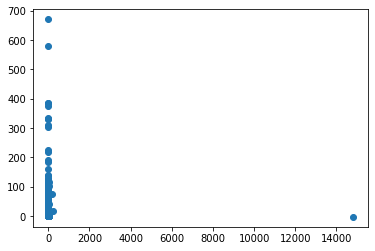

In [27]:
plt.scatter(X_pca_count[:,0], X_pca_count[:,1])

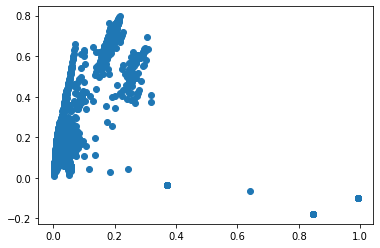

In [33]:
plt.scatter(X_pca_tfidf[:,0], X_pca_tfidf[:,1])

### Retenção de variância
Count possui autovetores mais bem definidos, que retém mais informação. No TF-IDF a informação tá mais distribuída e os dois principais autovetores não explicam tão bem.

Uma hipótese do pq isso acontece é que em count existem algumas palavras (features) que dominam as outras pq aparecem com muito mais frequência nos documentos. Como as features não foram normalizadas, então essas features que possuem valores grandes vão dominar as outras e o exemplo é caracterizado pela contagem destas features. Já em TF-IDF, como existe um processo de normalização pelo IDF (inverso da frequência do termo nos documentos), a descriação / caracterização do texto tá mais bem distribuída entre todas as features. Como confirmar essa hipótese?


### Clusterização
Ainda assim, parece que há presença de alguns clusters mais ou menos bem definidos e algumas leis bastante dissimilares a todas as outras. Uma análise interessante é olhar o que são essas leis.

# Buscas por texto

Já vimos que TF-IDF encontra Leis bastante similares entre si. Será que conseguimos também encontrar leis similares a uma query (consulta)? 

Primeiro temos que limpar o texto da consulta utilizando o mesmo método de limpeza das leis. Depois, transformar a consulta pra utilizar o IDF do modelo treinado. Finalmente, calcular a similaridade desta consulta pra todas as leis na base e retornar a mais próxima ou mais próximas.

In [82]:
consulta = ['azevedo lopes']
consulta[0] = limpa_texto(consulta[0])
consulta = vectorizer.transform(consulta)
consulta = transformer.transform(consulta)

In [83]:
mais_proximos = cosine_similarity(consulta, X_tfidf)
mais_proximos_idx = np.argsort(mais_proximos)
for i in range(1,5):
    idx = mais_proximos_idx[0, -i]
    print(leis.loc[idx, 'texto'])
    print('\n---proximo resultado---\n')

Autor: Humberto Lopes Cedraz

O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Estado da Bahia; Faço saber que a Câmara Municipal, através do Projeto de Lei nº 154/2001, de autoria do Edil Humberto Lopes Cedraz, decretou e eu sanciono a seguinte Lei:

Art. 1ºFica considerada de utilidade pública a ASSOCIAÇÃO UNIDA E BENEFICENTE DE FEIRA DE SANTANA.

Art. 2ºEsta Lei entrará em vigor na data da sua publicação, revogadas as disposições em contrário.

PREFEITURA MUNICIPAL DE FEIRA DE SANTANA, EM 28 DE NOVEMBRO DE 2001.

JOSÉ RONALDO DE CARVALHO
Prefeito

---proximo resultado---

Autor: Humberto Lopes Cedraz

O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Estado da Bahia; Faço saber que a Câmara Municipal, através do Projeto de Lei nº 140/2001, de autoria do Edil Humberto Lopes Cedraz, decretou e eu sanciono a seguinte Lei:

Art. 1ºFica considerada de utilidade pública a ASSOCIAÇÃO COMUNITÁRIA PROFISSIONALIZANTE PARQUE BRASIL, nesta cidade.

Art. 2ºEsta Lei entrará em vigor na data da sua publicação, r

Tcharam! Feito o buscador!

Existem limitações. A sequência e composição das palavras é uma delas, por exemplo. Não adianta buscar pelo nome - sobrenome de uma pessoa que ele vai retornar resultados onde algum destes termos sejam mais frequentes. Não existe as aspas do Google pra dizer "busque por este termo todo junto".

Por exemplo, se eu buscar Elydio aparece a primeira Lei conferindo cidadania à Elydio Azevedo Lopes. Perfeito. Mas se eu buscar Azevedo Lopes, o primeiro resultado sequer tem Azevedo, mas o nome Lopes aparece mais de uma vez.